TSLA residual ADF statistic: -31.439520180332163
TSLA residual p-value: 0.0
Critical values: {'1%': np.float64(-3.4366231443991118), '5%': np.float64(-2.864309749608104), '10%': np.float64(-2.568244725395481)}
RIVN ADF statistic: -31.76797677365964
RIVN p-value: 0.0
RIVN critical values: {'1%': np.float64(-3.4366231443991118), '5%': np.float64(-2.864309749608104), '10%': np.float64(-2.568244725395481)}
1.6290271521649597e-16
Date
2021-11-11    0.201499
2021-11-12    0.043135
2021-11-15    0.140976
2021-11-16    0.136088
2021-11-17   -0.156374
                ...   
2026-01-07    0.035356
2026-01-08   -0.005890
2026-01-09   -0.044401
2026-01-12   -0.004212
2026-01-13   -0.008071
Name: Close, Length: 1046, dtype: float64
1.3267483563876154e-19


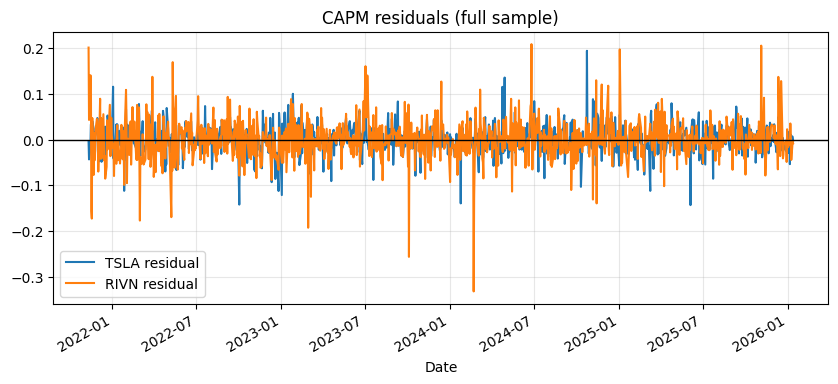

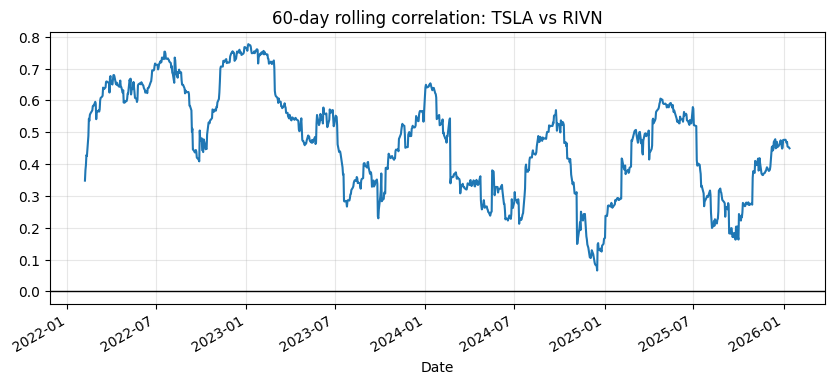

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
tsla = pd.read_csv(
    "https://stooq.com/q/d/l/?s=tsla.us&i=d",
    parse_dates=["Date"]
).set_index("Date").sort_index()

rivn = pd.read_csv(
    "https://stooq.com/q/d/l/?s=rivn.us&i=d",
    parse_dates=["Date"]
).set_index("Date").sort_index()

nio = pd.read_csv(
    "https://stooq.com/q/d/l/?s=nio.us&i=d",   # 蔚来 NIO
    parse_dates=["Date"]
).set_index("Date").sort_index()
spy = pd.read_csv(
    "https://stooq.com/q/d/l/?s=spy.us&i=d",
    parse_dates=["Date"]
).set_index("Date").sort_index()
r_m = np.log(spy["Close"]).diff().dropna()
r_tsla= np.log(tsla["Close"]).diff().dropna()
r_rivn=np.log(rivn["Close"]).diff().dropna()#计算各自的利率
tmp = pd.concat([r_tsla, r_rivn, r_m], axis=1).dropna()
r_tsla = tmp.iloc[:, 0]
r_rivn = tmp.iloc[:, 1]
r_m    = tmp.iloc[:, 2]#把他们粘贴在一起
beta_tsla = np.cov(r_tsla, r_m, ddof=1)[0,1] / np.var(r_m, ddof=1)#影响市场的强度
beta_rivn = np.cov(r_rivn, r_m, ddof=1)[0,1] / np.var(r_m, ddof=1)

alpha_tsla = r_tsla.mean() - beta_tsla * r_m.mean()
alpha_rivn = r_rivn.mean() - beta_rivn * r_m.mean()
eps_tsla = r_tsla - alpha_tsla - beta_tsla * r_m
eps_rivn = r_rivn - alpha_rivn - beta_rivn * r_m#是用来“把市场的影响拿掉之后，留下每只股票自己的那部分波动”
adf_tsla = adfuller(eps_tsla)

print("TSLA residual ADF statistic:", adf_tsla[0])
print("TSLA residual p-value:", adf_tsla[1])
print("Critical values:", adf_tsla[4])
adf_rivn = adfuller(eps_rivn)

print("RIVN ADF statistic:", adf_rivn[0])
print("RIVN p-value:", adf_rivn[1])
print("RIVN critical values:", adf_rivn[4])


print(eps_tsla.corr(r_m))
print(eps_rivn)
print(eps_tsla.mean())
plt.figure(figsize=(10,4))
eps_tsla.plot(label="TSLA residual")
eps_rivn.plot(label="RIVN residual")
plt.axhline(0, color="black", lw=1)
plt.legend()
plt.title("CAPM residuals (full sample)")
plt.grid(alpha=0.3)
plt.show()

rolling_corr = r_tsla.rolling(60).corr(r_rivn)

plt.figure(figsize=(10,4))
rolling_corr.plot()
plt.axhline(0, color="black", lw=1)
plt.title("60-day rolling correlation: TSLA vs RIVN")
plt.grid(alpha=0.3)
plt.show()
 
